# Visualization of Ford GoBike System data 
### by Nouf Balharith

## Investigation Overview
### This presentation shows the most favorite time to ride a bike along with the weekdays and hours. 
## Dataset Overview
### GoFord bike System data about the bike trips in April for 2019, with some attributes such as users type and duration of trips and more. Data already cleaned in the wrangling phase.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df=pd.read_csv('clean_file.csv')
df.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,start_day,duration_minute,start_hour
0,1128,2019-04-30 23:59:04.739,2019-05-01 00:17:53.091,124.0,19th St at Florida St,37.760447,-122.410807,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,877,Subscriber,No,Tue,18.800000,23
1,1388,2019-04-30 23:53:05.982,2019-05-01 00:16:14.313,243.0,Bancroft Way at College Ave,37.869360,-122.254337,247.0,Fulton St at Bancroft Way,37.867789,-122.265896,3234,Customer,No,Tue,23.133333,23


## Number of trips weekdays
### This graph reflects most days to ride a bike, Tuesday counted as the highest day for trips as shown next.

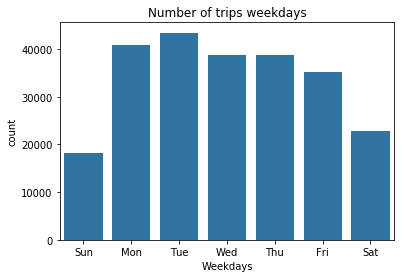

In [4]:
Days = [ 'Sun','Mon','Tue','Wed','Thu','Fri', 'Sat']
order_ = pd.api.types.CategoricalDtype(ordered = True, categories = Days)
df['start_day'] = df['start_day'].astype(order_)
base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'start_day',color=base_color);
plt.xlabel('Weekdays');
plt.title("Number of trips weekdays");

## Trips among weekdays and hours
### Going in more details, involving the start hours of trips along with weekdays, As will be shown next, At 5 PM in Tuesday is the highest count for trips comparing to other days and hours.  

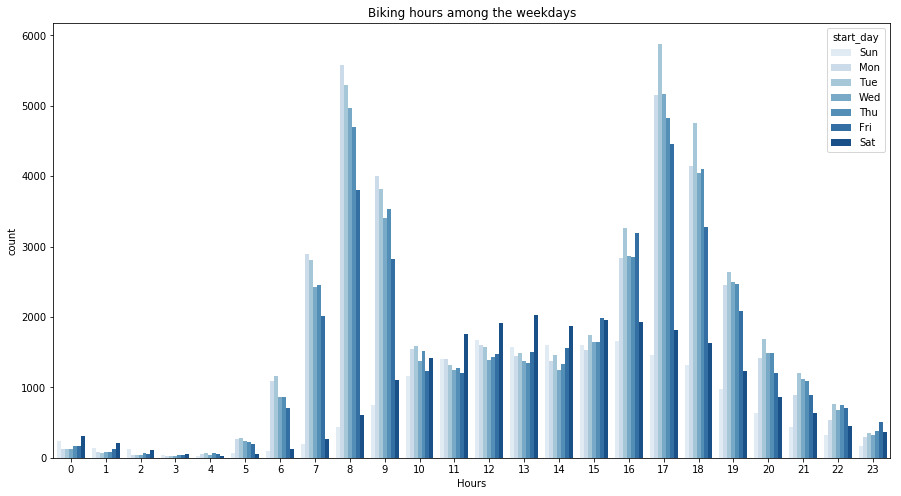

In [5]:
fig = plt.figure(figsize = [15,8])
sb.countplot(data = df, x = 'start_hour', hue = 'start_day', palette = 'Blues');
plt.title('Biking hours among the weekdays');
plt.xlabel('Hours');

## Biking durations across weekday and hours
### Days and hours mentioned but what about the duration? the next graph will present the relationship between these three attributes. It shows something different along with duration,  As will show next, Saturday counted as the longest trip durations at 4 AM and Friday at 3 AM.

#### This doesn't contradict with mentioned before, adding more attributes make a huge difference.

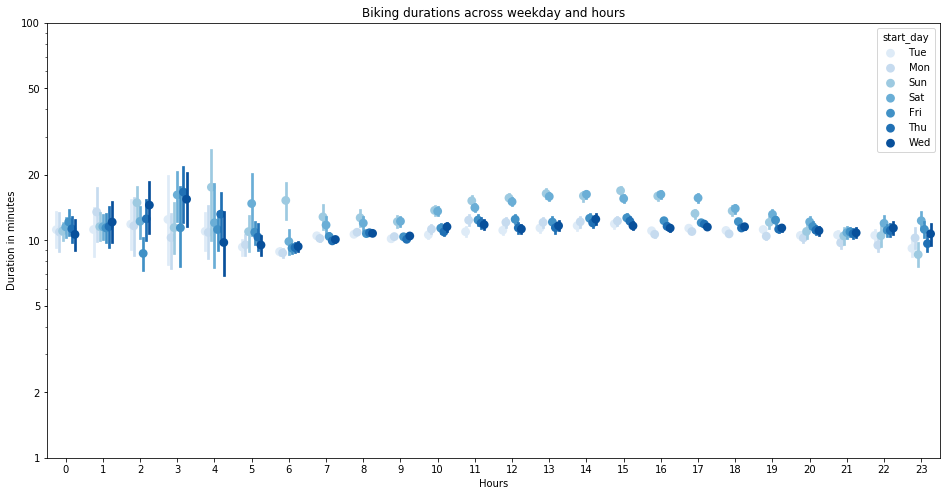

In [3]:
fig = plt.figure(figsize = [16,8])
a = sb.pointplot(data = df, x = 'start_hour', y = 'duration_minute', hue = 'start_day',
           palette = 'Blues', linestyles = '', dodge = 0.5);
plt.title('Biking durations across weekday and hours')
plt.xlabel('Hours');
plt.ylabel('Duration in minutes')
plt.yscale('log');
plt.yticks([1, 2, 5, 10, 20, 50, 100], [1, 2, 5, 10, 20, 50, 100]);
a.set_yticklabels([],minor = True);

In [ ]:
!jupyter nbconvert 'slide_deck_template.ipynb' --to slides --post serve --template output_toggle

[NbConvertApp] Converting notebook slide_deck_template.ipynb to slides
[NbConvertApp] Writing 324353 bytes to slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/slide_deck_template.slides.html
Use Control-C to stop this server
